# Simulation of atmospheric transparency at CTIO

- according data in MERRA2
- libradtran


In [87]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [88]:
import matplotlib.pyplot as plt
%matplotlib inline
import sys
import os
from astropy.io import fits
import numpy as np
import pandas as pd

In [89]:
import libsimulateTranspCTIOScattAbsAer as atmsim

# input files : data logbook and Merra data

In [90]:
file_merra2='MERRA2_2017_M2I1NXASM_M2T1NXAER_M2T1NXRAD_ctio_AllYear.csv'
file_logbook_ctio='ctiofulllogbook_jun2017_v4.csv'

## Merra data

In [91]:
df_merra2=pd.read_csv(file_merra2,index_col=0)

In [92]:
df_merra2.index.name='time'
df_merra2.sort_index(inplace=True)

In [93]:
df_merra2.head()

,ps,pwv,ozone,TOTEXTTAU,TOTANGSTR,TOTSCATAU,TAUTOT,TAUHGH,TAUMID,TAULOW
time,,,,,,,,,,
2017-04-30 00:00:00,78636.914062,2.822547,260.352051,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-04-30 00:30:00,NaN,NaN,NaN,0.029347,1.307469,0.027696,0.0,0.0,0.0,0.0
2017-04-30 01:00:00,78649.085938,2.668410,261.006653,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-04-30 01:30:00,NaN,NaN,NaN,0.028410,1.303434,0.026786,0.0,0.0,0.0,0.0
2017-04-30 02:00:00,78661.726562,2.609197,261.566254,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## CTIO data

In [94]:
df_ctio=pd.read_csv(file_logbook_ctio,sep=';')

In [95]:
df_ctio.columns

Index([u'Unnamed: 0', u'date', u'subdir', u'index', u'object', u'filter',
       u'disperser', u'airmass', u'exposure', u'focus', u'seeing', u'P', u'T',
       u'RH', u'W', u'file', u'Obj-posXpix', u'Obj-posYpix', u'Dx', u'Dy',
       u'comment', u'skip'],
      dtype='object')

In [96]:
df_ctio=df_ctio.reindex(columns=['date','P','T','RH','airmass','seeing','exposure','object','filter','disperser','focus','W','file']).set_index('date').sort_index()

In [97]:
df_ctio.head()

,P,T,RH,airmass,seeing,exposure,object,filter,disperser,focus,W,file
date,,,,,,,,,,,,
2017-05-28T01:36:40.705,779,"5,6",60,"1,009","1,443",5,pointing,dia,Thor300,0,"8,9",reduc_20170526_001.fits
2017-05-28T01:41:52.197,780,"5,6",60,"1,007","1,39",5,pointing,dia,Ron400,0,"10,8",reduc_20170526_002.fits
2017-05-28T01:46:06.150,779,"5,9",59,"1,057","1,255",5,pointing,dia,Ron400,0,"6,8",reduc_20170526_003.fits
2017-05-28T01:50:31.257,779,"5,9",57,"1,057","1,409",5,pointing,dia,Ron400,0,"9,1",reduc_20170526_004.fits
2017-05-28T01:58:18.598,779,"5,9",0,"1,058","1,293",5,pointing,dia,Ron400,0,"14,7",reduc_20170526_005.fits


In [98]:
df_ctio.tail()

,P,T,RH,airmass,seeing,exposure,object,filter,disperser,focus,W,file
date,,,,,,,,,,,,
2017-06-14T07:50:09.848,-4,-4,-4,"1,849","1,366",120,HD185975,RG715,HoloAmAg,12400,-4,reduc_20170613_095.fits
2017-06-14T07:53:38.102,-4,-4,-4,"1,027","1,366",60,HD205905,RG715,Thor300,12400,-4,reduc_20170613_096.fits
2017-06-14T07:55:30.851,-4,-4,-4,"1,025","1,366",60,HD205905,RG715,HoloPhP,12400,-4,reduc_20170613_097.fits
2017-06-14T07:57:24.265,-4,-4,-4,"1,023","1,366",120,HD205905,RG715,HoloPhAg,12400,-4,reduc_20170613_098.fits
2017-06-14T08:00:16.957,-4,-4,-4,"1,021","1,366",120,HD205905,RG715,HoloAmAg,12400,-4,reduc_20170613_099.fits


# Test LibRadTran

In [99]:
z_airmass=1.0
pwv=4.0
o3=300.
P=780.
aer=0.05

In [100]:
path,file=atmsim.ProcessSimulationaer(z_airmass,pwv,o3,aer,P) 

In [101]:
fullfilename=os.path.join(path,file)

In [102]:
data=np.loadtxt(fullfilename)

In [103]:
wl=data[:,0]

In [104]:
atm=data[:,1]

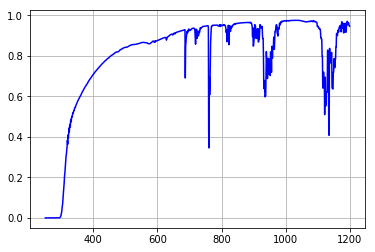

In [105]:
plt.plot(wl,atm,'b-')
plt.grid()

In [106]:
df_merra2.index.get_values()

array(['2017-04-30 00:00:00', '2017-04-30 00:30:00', '2017-04-30 01:00:00',
       ..., '2017-06-29 22:30:00', '2017-06-29 23:00:00',
       '2017-06-29 23:30:00'], dtype=object)

In [107]:
# convert the string into timestamp
#-------------------------------------
all_datetime=pd.to_datetime(df_merra2.index.get_values())

In [142]:
idx=0
for timestamp in all_datetime:
    month=timestamp.month
    day=timestamp.days_in_month
    hour=timestamp.hour
    minu=timestamp.minute
    
    # goal take every hours pressure, PWV and Ozone, and average the aerosols and clouds 30 min before and 30 min after
    if minu==0:
        ps=df_merra2.iloc[idx]["ps"]
        pwv=df_merra2.iloc[idx]["pwv"]
        ozone=df_merra2.iloc[idx]["ozone"]
        print 'idx=',idx, ' timestamp=',timestamp,' P=',ps,' pwv=',pwv,' ozone =',ozone
        deltat=(all_datetime-timestamp).total_seconds()
        idx_before=np.where(deltat==-1800)[0] # which is the index 1800 seconds before
        idx_after=np.where(deltat==1800)[0]   # which is the index 1800 seconds after
        if idx_before.size==0 and idx_after.size==1:
            aer=df_merra2.iloc[idx_after[0]]["TOTEXTTAU"]
            clouds=df_merra2.iloc[idx_after[0]]["TAUTOT"]
        elif idx_before.size==1 and idx_after.size==0:
            aer=df_merra2.iloc[idx_before[0]]["TOTEXTTAU"] 
            clouds=df_merra2.iloc[idx_before[0]]["TAUTOT"] 
        elif idx_before.size==1 and idx_after.size==1:
            aer=np.mean([df_merra2.iloc[idx_before[0]]["TOTEXTTAU"] ,df_merra2.iloc[idx_after[0]]["TOTEXTTAU"] ])
            clouds=np.mean([df_merra2.iloc[idx_before[0]]["TAUTOT"] ,df_merra2.iloc[idx_after[0]]["TAUTOT"] ])
        else:
            aer=0
            clouds=0
            
        print ' \t aer=',aer, ' , clouds = ',clouds,' , : index before and after :', idx_before,' ',idx_after, idx_before.size, idx_after.size
                
    idx+=1

idx= 0  timestamp= 2017-04-30 00:00:00  P= 78636.9140625  pwv= 2.8225467205  ozone = 260.352050781
 	 aer= 0.0293471701443  , clouds =  0.0  , : index before and after : []   [1] 0 1
idx= 2  timestamp= 2017-04-30 01:00:00  P= 78649.0859375  pwv= 2.66840982437  ozone = 261.006652832
 	 aer= 0.0288784056902  , clouds =  0.0  , : index before and after : [1]   [3] 1 1
idx= 4  timestamp= 2017-04-30 02:00:00  P= 78661.7265625  pwv= 2.6091966629  ozone = 261.566253662
 	 aer= 0.0282445503399  , clouds =  0.0  , : index before and after : [3]   [5] 1 1
idx= 6  timestamp= 2017-04-30 03:00:00  P= 78667.5234375  pwv= 2.57953715324  ozone = 262.164581299
 	 aer= 0.0278896754607  , clouds =  0.0  , : index before and after : [5]   [7] 1 1
idx= 8  timestamp= 2017-04-30 04:00:00  P= 78669.828125  pwv= 2.51703667641  ozone = 263.143188477
 	 aer= 0.0272771045566  , clouds =  0.0  , : index before and after : [7]   [9] 1 1
idx= 10  timestamp= 2017-04-30 05:00:00  P= 78661.9296875  pwv= 2.42353320122  

idx= 88  timestamp= 2017-05-01 20:00:00  P= 78692.8359375  pwv= 4.93173360825  ozone = 256.036560059
 	 aer= 0.0465817693621  , clouds =  1.20849680901  , : index before and after : [87]   [89] 1 1
idx= 90  timestamp= 2017-05-01 21:00:00  P= 78693.609375  pwv= 4.98692750931  ozone = 255.944580078
 	 aer= 0.0465197395534  , clouds =  2.44311523438  , : index before and after : [89]   [91] 1 1
idx= 92  timestamp= 2017-05-01 22:00:00  P= 78706.4921875  pwv= 4.98160934448  ozone = 255.836273193
 	 aer= 0.0452676583082  , clouds =  3.52783203125  , : index before and after : [91]   [93] 1 1
idx= 94  timestamp= 2017-05-01 23:00:00  P= 78717.5703125  pwv= 4.72824335098  ozone = 256.398406982
 	 aer= 0.0416910666972  , clouds =  4.01611328125  , : index before and after : [93]   [95] 1 1
idx= 96  timestamp= 2017-05-02 00:00:00  P= 78725.8359375  pwv= 4.43993330002  ozone = 256.381622314
 	 aer= 0.037327516824  , clouds =  4.134765625  , : index before and after : [95]   [97] 1 1
idx= 98  times

idx= 198  timestamp= 2017-05-04 03:00:00  P= 78594.3359375  pwv= 3.30417895317  ozone = 284.793243408
 	 aer= 0.0294261816889  , clouds =  0.0  , : index before and after : [197]   [199] 1 1
idx= 200  timestamp= 2017-05-04 04:00:00  P= 78580.203125  pwv= 3.04703164101  ozone = 282.888519287
 	 aer= 0.0273358318955  , clouds =  0.0  , : index before and after : [199]   [201] 1 1
idx= 202  timestamp= 2017-05-04 05:00:00  P= 78554.796875  pwv= 2.78221869469  ozone = 281.441070557
 	 aer= 0.0250974204391  , clouds =  0.0  , : index before and after : [201]   [203] 1 1
idx= 204  timestamp= 2017-05-04 06:00:00  P= 78526.515625  pwv= 2.61425161362  ozone = 282.141296387
 	 aer= 0.023455296643  , clouds =  0.0  , : index before and after : [203]   [205] 1 1
idx= 206  timestamp= 2017-05-04 07:00:00  P= 78492.203125  pwv= 2.57426905632  ozone = 282.905975342
 	 aer= 0.0223425207659  , clouds =  0.0  , : index before and after : [205]   [207] 1 1
idx= 208  timestamp= 2017-05-04 08:00:00  P= 78457

idx= 310  timestamp= 2017-05-06 11:00:00  P= 78190.796875  pwv= 4.10017490387  ozone = 259.818725586
 	 aer= 0.0415572188794  , clouds =  1.77734380961  , : index before and after : [309]   [311] 1 1
idx= 312  timestamp= 2017-05-06 12:00:00  P= 78254.1875  pwv= 4.51793193817  ozone = 259.487518311
 	 aer= 0.0487501136959  , clouds =  1.99560552835  , : index before and after : [311]   [313] 1 1
idx= 314  timestamp= 2017-05-06 13:00:00  P= 78315.4921875  pwv= 4.84369850159  ozone = 260.027496338
 	 aer= 0.0553169008344  , clouds =  1.80493170023  , : index before and after : [313]   [315] 1 1
idx= 316  timestamp= 2017-05-06 14:00:00  P= 78349.671875  pwv= 5.09511804581  ozone = 260.668121338
 	 aer= 0.0560932569206  , clouds =  1.37133789062  , : index before and after : [315]   [317] 1 1
idx= 318  timestamp= 2017-05-06 15:00:00  P= 78374.2734375  pwv= 5.38557910919  ozone = 261.559997559
 	 aer= 0.0525308568031  , clouds =  1.54931640625  , : index before and after : [317]   [319] 1 1


 	 aer= 0.0303120333701  , clouds =  0.0711063072085  , : index before and after : [423]   [425] 1 1
idx= 426  timestamp= 2017-05-08 21:00:00  P= 78290.1171875  pwv= 5.89921712875  ozone = 269.520507812
 	 aer= 0.0311350114644  , clouds =  0.269226469099  , : index before and after : [425]   [427] 1 1
idx= 428  timestamp= 2017-05-08 22:00:00  P= 78292.421875  pwv= 5.82014799118  ozone = 267.542877197
 	 aer= 0.0307514136657  , clouds =  0.206955014728  , : index before and after : [427]   [429] 1 1
idx= 430  timestamp= 2017-05-08 23:00:00  P= 78298.5546875  pwv= 5.53741931915  ozone = 266.924255371
 	 aer= 0.0299079697579  , clouds =  0.265060587786  , : index before and after : [429]   [431] 1 1
idx= 432  timestamp= 2017-05-09 00:00:00  P= 78300.8203125  pwv= 5.13005161285  ozone = 265.468200684
 	 aer= 0.0290064420551  , clouds =  0.951538234949  , : index before and after : [431]   [433] 1 1
idx= 434  timestamp= 2017-05-09 01:00:00  P= 78306.6171875  pwv= 4.76327705383  ozone = 264.

idx= 538  timestamp= 2017-05-11 05:00:00  P= 78202.4296875  pwv= 9.35351371765  ozone = 263.989990234
 	 aer= 0.0352076478303  , clouds =  59.0546875  , : index before and after : [537]   [539] 1 1
idx= 540  timestamp= 2017-05-11 06:00:00  P= 78170.21875  pwv= 9.85325527191  ozone = 263.220611572
 	 aer= 0.0349938236177  , clouds =  48.75  , : index before and after : [539]   [541] 1 1
idx= 542  timestamp= 2017-05-11 07:00:00  P= 78134.703125  pwv= 10.2012119293  ozone = 262.982666016
 	 aer= 0.0352246947587  , clouds =  35.96875  , : index before and after : [541]   [543] 1 1
idx= 544  timestamp= 2017-05-11 08:00:00  P= 78102.578125  pwv= 10.7831354141  ozone = 263.587432861
 	 aer= 0.035691536963  , clouds =  30.4453125  , : index before and after : [543]   [545] 1 1
idx= 546  timestamp= 2017-05-11 09:00:00  P= 78094.5078125  pwv= 11.107717514  ozone = 263.417327881
 	 aer= 0.0339080132544  , clouds =  28.53125  , : index before and after : [545]   [547] 1 1
idx= 548  timestamp= 2017

 	 aer= 0.0136501002126  , clouds =  0.380768001079  , : index before and after : [639]   [641] 1 1
idx= 642  timestamp= 2017-05-13 09:00:00  P= 78321.1171875  pwv= 8.16206741333  ozone = 263.794464111
 	 aer= 0.0132875842974  , clouds =  0.35220348835  , : index before and after : [641]   [643] 1 1
idx= 644  timestamp= 2017-05-13 10:00:00  P= 78361.578125  pwv= 7.47274923325  ozone = 262.737335205
 	 aer= 0.0132089173421  , clouds =  0.335663050414  , : index before and after : [643]   [645] 1 1
idx= 646  timestamp= 2017-05-13 11:00:00  P= 78447.5859375  pwv= 7.13505792618  ozone = 261.538848877
 	 aer= 0.0130040994845  , clouds =  0.085418879986  , : index before and after : [645]   [647] 1 1
idx= 648  timestamp= 2017-05-13 12:00:00  P= 78513.265625  pwv= 6.70566940308  ozone = 260.840759277
 	 aer= 0.0124649042264  , clouds =  0.0  , : index before and after : [647]   [649] 1 1
idx= 650  timestamp= 2017-05-13 13:00:00  P= 78534.9765625  pwv= 6.14737796783  ozone = 261.210571289
 	 a

idx= 730  timestamp= 2017-05-15 05:00:00  P= 78649.0  pwv= 3.08835959435  ozone = 263.902832031
 	 aer= 0.0153441168367  , clouds =  0.0  , : index before and after : [729]   [731] 1 1
idx= 732  timestamp= 2017-05-15 06:00:00  P= 78628.484375  pwv= 2.74487781525  ozone = 261.037414551
 	 aer= 0.0139663154259  , clouds =  0.0  , : index before and after : [731]   [733] 1 1
idx= 734  timestamp= 2017-05-15 07:00:00  P= 78599.4375  pwv= 2.52751708031  ozone = 259.240478516
 	 aer= 0.0129318232648  , clouds =  0.0  , : index before and after : [733]   [735] 1 1
idx= 736  timestamp= 2017-05-15 08:00:00  P= 78549.71875  pwv= 2.26887083054  ozone = 257.285736084
 	 aer= 0.0120704923756  , clouds =  0.0  , : index before and after : [735]   [737] 1 1
idx= 738  timestamp= 2017-05-15 09:00:00  P= 78537.0078125  pwv= 2.08761000633  ozone = 255.79486084
 	 aer= 0.0115399695933  , clouds =  0.00351756229066  , : index before and after : [737]   [739] 1 1
idx= 740  timestamp= 2017-05-15 10:00:00  P= 

 	 aer= 0.0568114481866  , clouds =  0.965088009835  , : index before and after : [833]   [835] 1 1
idx= 836  timestamp= 2017-05-17 10:00:00  P= 78254.7265625  pwv= 6.71401357651  ozone = 268.279083252
 	 aer= 0.0675982236862  , clouds =  1.44677752257  , : index before and after : [835]   [837] 1 1
idx= 838  timestamp= 2017-05-17 11:00:00  P= 78282.5078125  pwv= 6.73132705688  ozone = 269.192230225
 	 aer= 0.0678230673074  , clouds =  1.30175840855  , : index before and after : [837]   [839] 1 1
idx= 840  timestamp= 2017-05-17 12:00:00  P= 78287.796875  pwv= 6.34044837952  ozone = 270.31817627
 	 aer= 0.058078661561  , clouds =  0.576111353934  , : index before and after : [839]   [841] 1 1
idx= 842  timestamp= 2017-05-17 13:00:00  P= 78328.6796875  pwv= 6.40863132477  ozone = 271.620452881
 	 aer= 0.0554309580475  , clouds =  0.620056338608  , : index before and after : [841]   [843] 1 1
idx= 844  timestamp= 2017-05-17 14:00:00  P= 78386.03125  pwv= 6.85655403137  ozone = 272.5772399

idx= 930  timestamp= 2017-05-19 09:00:00  P= 78151.2109375  pwv= 3.12864947319  ozone = 284.667633057
 	 aer= 0.0124381021597  , clouds =  0.0  , : index before and after : [929]   [931] 1 1
idx= 932  timestamp= 2017-05-19 10:00:00  P= 78145.6484375  pwv= 3.0563685894  ozone = 284.464385986
 	 aer= 0.012266302947  , clouds =  0.0  , : index before and after : [931]   [933] 1 1
idx= 934  timestamp= 2017-05-19 11:00:00  P= 78168.296875  pwv= 2.97367453575  ozone = 284.050476074
 	 aer= 0.0123391705565  , clouds =  0.0  , : index before and after : [933]   [935] 1 1
idx= 936  timestamp= 2017-05-19 12:00:00  P= 78194.796875  pwv= 2.85536527634  ozone = 283.510925293
 	 aer= 0.0125177823938  , clouds =  0.0  , : index before and after : [935]   [937] 1 1
idx= 938  timestamp= 2017-05-19 13:00:00  P= 78215.7734375  pwv= 2.75358080864  ozone = 283.881744385
 	 aer= 0.0128360707313  , clouds =  0.0  , : index before and after : [937]   [939] 1 1
idx= 940  timestamp= 2017-05-19 14:00:00  P= 7823

idx= 1040  timestamp= 2017-05-21 16:00:00  P= 78560.40625  pwv= 4.3891043663  ozone = 274.105560303
 	 aer= 0.0159176783636  , clouds =  0.0  , : index before and after : [1039]   [1041] 1 1
idx= 1042  timestamp= 2017-05-21 17:00:00  P= 78523.5546875  pwv= 4.54685544968  ozone = 275.23135376
 	 aer= 0.0161526547744  , clouds =  0.0  , : index before and after : [1041]   [1043] 1 1
idx= 1044  timestamp= 2017-05-21 18:00:00  P= 78481.125  pwv= 4.72162151337  ozone = 275.58416748
 	 aer= 0.0173584297299  , clouds =  0.0  , : index before and after : [1043]   [1045] 1 1
idx= 1046  timestamp= 2017-05-21 19:00:00  P= 78450.4765625  pwv= 4.8367190361  ozone = 275.454956055
 	 aer= 0.0186406010761  , clouds =  0.00111394829583  , : index before and after : [1045]   [1047] 1 1
idx= 1048  timestamp= 2017-05-21 20:00:00  P= 78428.5390625  pwv= 4.83493041992  ozone = 275.334136963
 	 aer= 0.0193017134442  , clouds =  0.014660290326  , : index before and after : [1047]   [1049] 1 1
idx= 1050  times

idx= 1152  timestamp= 2017-05-24 00:00:00  P= 78241.9296875  pwv= 8.16712284088  ozone = 264.153747559
 	 aer= 0.0458773411811  , clouds =  17.0820322037  , : index before and after : [1151]   [1153] 1 1
idx= 1154  timestamp= 2017-05-24 01:00:00  P= 78257.2578125  pwv= 7.8501534462  ozone = 263.946838379
 	 aer= 0.0449207071215  , clouds =  12.119140625  , : index before and after : [1153]   [1155] 1 1
idx= 1156  timestamp= 2017-05-24 02:00:00  P= 78275.5234375  pwv= 7.76555585861  ozone = 263.672363281
 	 aer= 0.045592956245  , clouds =  7.77929735183  , : index before and after : [1155]   [1157] 1 1
idx= 1158  timestamp= 2017-05-24 03:00:00  P= 78275.4375  pwv= 7.81177759171  ozone = 263.734313965
 	 aer= 0.0471144095064  , clouds =  7.31445360183  , : index before and after : [1157]   [1159] 1 1
idx= 1160  timestamp= 2017-05-24 04:00:00  P= 78254.328125  pwv= 7.9596786499  ozone = 264.28729248
 	 aer= 0.0500651672483  , clouds =  7.61132836342  , : index before and after : [1159]   

 	 aer= 0.0345608070493  , clouds =  57.7578125  , : index before and after : [1237]   [1239] 1 1
idx= 1240  timestamp= 2017-05-25 20:00:00  P= 78414.984375  pwv= 8.06320667267  ozone = 281.660217285
 	 aer= 0.0343751590699  , clouds =  57.9296875  , : index before and after : [1239]   [1241] 1 1
idx= 1242  timestamp= 2017-05-25 21:00:00  P= 78423.9296875  pwv= 7.73190164566  ozone = 281.047515869
 	 aer= 0.0326339621097  , clouds =  46.78125  , : index before and after : [1241]   [1243] 1 1
idx= 1244  timestamp= 2017-05-25 22:00:00  P= 78428.4765625  pwv= 7.36036586761  ozone = 281.412506104
 	 aer= 0.0311987306923  , clouds =  22.2958984375  , : index before and after : [1243]   [1245] 1 1
idx= 1246  timestamp= 2017-05-25 23:00:00  P= 78436.8671875  pwv= 6.88103485107  ozone = 281.903167725
 	 aer= 0.0295290444046  , clouds =  3.2177734375  , : index before and after : [1245]   [1247] 1 1
idx= 1248  timestamp= 2017-05-26 00:00:00  P= 78445.6015625  pwv= 6.26249027252  ozone = 282.694

idx= 1350  timestamp= 2017-05-28 03:00:00  P= 78573.28125  pwv= 1.988093853  ozone = 269.268249512
 	 aer= 0.0167772537098  , clouds =  0.121386918341  , : index before and after : [1349]   [1351] 1 1
idx= 1352  timestamp= 2017-05-28 04:00:00  P= 78545.7890625  pwv= 2.0557243824  ozone = 269.085266113
 	 aer= 0.0182545380667  , clouds =  0.613983415068  , : index before and after : [1351]   [1353] 1 1
idx= 1354  timestamp= 2017-05-28 05:00:00  P= 78500.8828125  pwv= 2.15297675133  ozone = 268.995483398
 	 aer= 0.0201428718865  , clouds =  1.49511757493  , : index before and after : [1353]   [1355] 1 1
idx= 1356  timestamp= 2017-05-28 06:00:00  P= 78473.1328125  pwv= 2.47634077072  ozone = 268.803314209
 	 aer= 0.0222689816728  , clouds =  1.74853551388  , : index before and after : [1355]   [1357] 1 1
idx= 1358  timestamp= 2017-05-28 07:00:00  P= 78447.0078125  pwv= 2.79239177704  ozone = 269.183197021
 	 aer= 0.0235965643078  , clouds =  0.961548194289  , : index before and after : [1

 	 aer= 0.0235823122785  , clouds =  0.0  , : index before and after : [1449]   [1451] 1 1
idx= 1452  timestamp= 2017-05-30 06:00:00  P= 78583.2734375  pwv= 4.57953977585  ozone = 279.38104248
 	 aer= 0.0217490280047  , clouds =  0.0  , : index before and after : [1451]   [1453] 1 1
idx= 1454  timestamp= 2017-05-30 07:00:00  P= 78588.8359375  pwv= 4.57069063187  ozone = 277.358428955
 	 aer= 0.0203200951218  , clouds =  0.0  , : index before and after : [1453]   [1455] 1 1
idx= 1456  timestamp= 2017-05-30 08:00:00  P= 78593.9765625  pwv= 4.52311325073  ozone = 275.66015625
 	 aer= 0.0189501484856  , clouds =  0.0  , : index before and after : [1455]   [1457] 1 1
idx= 1458  timestamp= 2017-05-30 09:00:00  P= 78600.4921875  pwv= 4.40225982666  ozone = 274.932250977
 	 aer= 0.0175300044939  , clouds =  0.0  , : index before and after : [1457]   [1459] 1 1
idx= 1460  timestamp= 2017-05-30 10:00:00  P= 78617.109375  pwv= 4.19944286346  ozone = 273.662475586
 	 aer= 0.0162000912242  , clouds

idx= 1558  timestamp= 2017-06-01 11:00:00  P= 78664.328125  pwv= 2.45410656929  ozone = 258.470184326
 	 aer= 0.0137333711609  , clouds =  0.206512488424  , : index before and after : [1557]   [1559] 1 1
idx= 1560  timestamp= 2017-06-01 12:00:00  P= 78681.2265625  pwv= 2.42763519287  ozone = 259.495300293
 	 aer= 0.0138617628254  , clouds =  0.23638921976  , : index before and after : [1559]   [1561] 1 1
idx= 1562  timestamp= 2017-06-01 13:00:00  P= 78696.1328125  pwv= 2.37634277344  ozone = 261.4921875
 	 aer= 0.0131357032805  , clouds =  0.104923354462  , : index before and after : [1561]   [1563] 1 1
idx= 1564  timestamp= 2017-06-01 14:00:00  P= 78722.1015625  pwv= 2.39819121361  ozone = 262.793060303
 	 aer= 0.0124803143554  , clouds =  0.00879293866455  , : index before and after : [1563]   [1565] 1 1
idx= 1566  timestamp= 2017-06-01 15:00:00  P= 78750.359375  pwv= 2.55123376846  ozone = 263.363891602
 	 aer= 0.0138332522474  , clouds =  0.0605469085275  , : index before and after

 	 aer= 0.0247438093647  , clouds =  1.7106935978  , : index before and after : [1677]   [1679] 1 1
idx= 1680  timestamp= 2017-06-04 00:00:00  P= 78446.140625  pwv= 4.00187730789  ozone = 262.80267334
 	 aer= 0.023854480125  , clouds =  2.16674840451  , : index before and after : [1679]   [1681] 1 1
idx= 1682  timestamp= 2017-06-04 01:00:00  P= 78470.5546875  pwv= 3.78139519691  ozone = 263.763305664
 	 aer= 0.022701792419  , clouds =  2.30517613888  , : index before and after : [1681]   [1683] 1 1
idx= 1684  timestamp= 2017-06-04 02:00:00  P= 78479.0625  pwv= 3.54264855385  ozone = 264.848449707
 	 aer= 0.0211388729513  , clouds =  2.01684594155  , : index before and after : [1683]   [1685] 1 1
idx= 1686  timestamp= 2017-06-04 03:00:00  P= 78476.2265625  pwv= 3.35979223251  ozone = 265.501708984
 	 aer= 0.0201333211735  , clouds =  1.68652373552  , : index before and after : [1685]   [1687] 1 1
idx= 1688  timestamp= 2017-06-04 04:00:00  P= 78464.640625  pwv= 3.28735399246  ozone = 266

 	 aer= 0.0234799422324  , clouds =  0.0  , : index before and after : [1777]   [1779] 1 1
idx= 1780  timestamp= 2017-06-06 02:00:00  P= 78383.2734375  pwv= 3.95512580872  ozone = 296.271057129
 	 aer= 0.0219711177051  , clouds =  0.0  , : index before and after : [1779]   [1781] 1 1
idx= 1782  timestamp= 2017-06-06 03:00:00  P= 78376.1328125  pwv= 3.8112950325  ozone = 296.043945312
 	 aer= 0.0212059449405  , clouds =  0.0  , : index before and after : [1781]   [1783] 1 1
idx= 1784  timestamp= 2017-06-06 04:00:00  P= 78379.1640625  pwv= 3.76537632942  ozone = 295.443817139
 	 aer= 0.0215993942693  , clouds =  0.0  , : index before and after : [1783]   [1785] 1 1
idx= 1786  timestamp= 2017-06-06 05:00:00  P= 78377.515625  pwv= 3.82218575478  ozone = 294.652557373
 	 aer= 0.0234170351177  , clouds =  0.0  , : index before and after : [1785]   [1787] 1 1
idx= 1788  timestamp= 2017-06-06 06:00:00  P= 78376.0  pwv= 3.97676753998  ozone = 293.933105469
 	 aer= 0.0262082749978  , clouds =  0

 	 aer= 0.072186049074  , clouds =  8.142578125  , : index before and after : [1877]   [1879] 1 1
idx= 1880  timestamp= 2017-06-08 04:00:00  P= 78904.453125  pwv= 6.62159633636  ozone = 307.079772949
 	 aer= 0.0617522243411  , clouds =  11.34375  , : index before and after : [1879]   [1881] 1 1
idx= 1882  timestamp= 2017-06-08 05:00:00  P= 78896.859375  pwv= 6.51845598221  ozone = 304.881744385
 	 aer= 0.0502069052309  , clouds =  12.14453125  , : index before and after : [1881]   [1883] 1 1
idx= 1884  timestamp= 2017-06-08 06:00:00  P= 78881.53125  pwv= 6.43281936646  ozone = 302.372802734
 	 aer= 0.0418781600893  , clouds =  6.60400402546  , : index before and after : [1883]   [1885] 1 1
idx= 1886  timestamp= 2017-06-08 07:00:00  P= 78863.0703125  pwv= 6.24348545074  ozone = 300.697692871
 	 aer= 0.0372948423028  , clouds =  2.08447313309  , : index before and after : [1885]   [1887] 1 1
idx= 1888  timestamp= 2017-06-08 08:00:00  P= 78867.90625  pwv= 6.08761501312  ozone = 300.274475

idx= 1982  timestamp= 2017-06-10 07:00:00  P= 78590.96875  pwv= 2.69827866554  ozone = 267.660949707
 	 aer= 0.0102433171123  , clouds =  0.0165750435553  , : index before and after : [1981]   [1983] 1 1
idx= 1984  timestamp= 2017-06-10 08:00:00  P= 78529.0546875  pwv= 2.6258661747  ozone = 267.641296387
 	 aer= 0.0102066840045  , clouds =  0.0277407141402  , : index before and after : [1983]   [1985] 1 1
idx= 1986  timestamp= 2017-06-10 09:00:00  P= 78480.375  pwv= 2.58177351952  ozone = 267.780761719
 	 aer= 0.0101002715528  , clouds =  0.0319634396582  , : index before and after : [1985]   [1987] 1 1
idx= 1988  timestamp= 2017-06-10 10:00:00  P= 78471.9140625  pwv= 2.5463848114  ozone = 268.844482422
 	 aer= 0.00980914616958  , clouds =  0.0253029698506  , : index before and after : [1987]   [1989] 1 1
idx= 1990  timestamp= 2017-06-10 11:00:00  P= 78498.5078125  pwv= 2.54621648788  ozone = 270.777099609
 	 aer= 0.00938184512779  , clouds =  0.0118381022476  , : index before and afte

 	 aer= 0.0209877882152  , clouds =  0.0  , : index before and after : [2087]   [2089] 1 1
idx= 2090  timestamp= 2017-06-12 13:00:00  P= 78567.765625  pwv= 4.51855564117  ozone = 267.914398193
 	 aer= 0.0214342474937  , clouds =  0.0  , : index before and after : [2089]   [2091] 1 1
idx= 2092  timestamp= 2017-06-12 14:00:00  P= 78564.59375  pwv= 4.49840450287  ozone = 268.790374756
 	 aer= 0.0215605413541  , clouds =  0.0  , : index before and after : [2091]   [2093] 1 1
idx= 2094  timestamp= 2017-06-12 15:00:00  P= 78548.1484375  pwv= 4.58017158508  ozone = 269.140014648
 	 aer= 0.0229979548604  , clouds =  0.0  , : index before and after : [2093]   [2095] 1 1
idx= 2096  timestamp= 2017-06-12 16:00:00  P= 78523.390625  pwv= 4.72987318039  ozone = 268.750183105
 	 aer= 0.0249275006354  , clouds =  0.0  , : index before and after : [2095]   [2097] 1 1
idx= 2098  timestamp= 2017-06-12 17:00:00  P= 78481.953125  pwv= 4.95242261887  ozone = 267.838684082
 	 aer= 0.0267467470839  , clouds =

 	 aer= 0.0361913219094  , clouds =  1.47998052836  , : index before and after : [2189]   [2191] 1 1
idx= 2192  timestamp= 2017-06-14 16:00:00  P= 78583.265625  pwv= 3.53141784668  ozone = 252.630310059
 	 aer= 0.0369448475539  , clouds =  1.91259783507  , : index before and after : [2191]   [2193] 1 1
idx= 2194  timestamp= 2017-06-14 17:00:00  P= 78565.1640625  pwv= 3.86814045906  ozone = 251.309509277
 	 aer= 0.0397572629153  , clouds =  2.72705090046  , : index before and after : [2193]   [2195] 1 1
idx= 2196  timestamp= 2017-06-14 18:00:00  P= 78555.203125  pwv= 4.11999368668  ozone = 249.744689941
 	 aer= 0.0418951753527  , clouds =  3.59814453125  , : index before and after : [2195]   [2197] 1 1
idx= 2198  timestamp= 2017-06-14 19:00:00  P= 78525.671875  pwv= 4.14137554169  ozone = 248.256988525
 	 aer= 0.0417344644666  , clouds =  4.439453125  , : index before and after : [2197]   [2199] 1 1
idx= 2200  timestamp= 2017-06-14 20:00:00  P= 78501.71875  pwv= 4.03977680206  ozone = 2

idx= 2286  timestamp= 2017-06-16 15:00:00  P= 78374.53125  pwv= 6.06108379364  ozone = 266.784606934
 	 aer= 0.0201211795211  , clouds =  1.23193371296  , : index before and after : [2285]   [2287] 1 1
idx= 2288  timestamp= 2017-06-16 16:00:00  P= 78367.5625  pwv= 6.53162288666  ozone = 266.728790283
 	 aer= 0.0237679388374  , clouds =  1.77758795023  , : index before and after : [2287]   [2289] 1 1
idx= 2290  timestamp= 2017-06-16 17:00:00  P= 78359.8046875  pwv= 7.27754592896  ozone = 265.96194458
 	 aer= 0.0279014958069  , clouds =  3.46923828125  , : index before and after : [2289]   [2291] 1 1
idx= 2292  timestamp= 2017-06-16 18:00:00  P= 78344.4375  pwv= 8.1446428299  ozone = 264.653656006
 	 aer= 0.0345026096329  , clouds =  18.0634765625  , : index before and after : [2291]   [2293] 1 1
idx= 2294  timestamp= 2017-06-16 19:00:00  P= 78337.40625  pwv= 8.87099170685  ozone = 264.27142334
 	 aer= 0.0406835470348  , clouds =  32.19921875  , : index before and after : [2293]   [2295]

idx= 2388  timestamp= 2017-06-18 18:00:00  P= 78659.5625  pwv= 2.28167772293  ozone = 279.45489502
 	 aer= 0.0216048136354  , clouds =  1.08435064554  , : index before and after : [2387]   [2389] 1 1
idx= 2390  timestamp= 2017-06-18 19:00:00  P= 78657.71875  pwv= 2.38662910461  ozone = 279.46975708
 	 aer= 0.0215883599595  , clouds =  0.691589385271  , : index before and after : [2389]   [2391] 1 1
idx= 2392  timestamp= 2017-06-18 20:00:00  P= 78650.40625  pwv= 2.29579424858  ozone = 279.483673096
 	 aer= 0.0204416429624  , clouds =  0.299286037683  , : index before and after : [2391]   [2393] 1 1
idx= 2394  timestamp= 2017-06-18 21:00:00  P= 78639.1484375  pwv= 2.04117703438  ozone = 281.27633667
 	 aer= 0.0186253990978  , clouds =  0.0753480196  , : index before and after : [2393]   [2395] 1 1
idx= 2396  timestamp= 2017-06-18 22:00:00  P= 78644.0  pwv= 1.68129813671  ozone = 283.171783447
 	 aer= 0.016571465414  , clouds =  0.0  , : index before and after : [2395]   [2397] 1 1
idx= 2

 	 aer= 0.019831739366  , clouds =  0.30517578125  , : index before and after : [2487]   [2489] 1 1
idx= 2490  timestamp= 2017-06-20 21:00:00  P= 78406.046875  pwv= 3.63402056694  ozone = 278.831176758
 	 aer= 0.0204967828468  , clouds =  0.0165024530143  , : index before and after : [2489]   [2491] 1 1
idx= 2492  timestamp= 2017-06-20 22:00:00  P= 78441.234375  pwv= 3.65469908714  ozone = 277.347869873
 	 aer= 0.0216379128396  , clouds =  0.0760728288442  , : index before and after : [2491]   [2493] 1 1
idx= 2494  timestamp= 2017-06-20 23:00:00  P= 78458.5625  pwv= 3.48262238503  ozone = 275.518188477
 	 aer= 0.0200793510303  , clouds =  0.0839081555605  , : index before and after : [2493]   [2495] 1 1
idx= 2496  timestamp= 2017-06-21 00:00:00  P= 78457.1484375  pwv= 3.24385881424  ozone = 274.118469238
 	 aer= 0.0169800259173  , clouds =  0.0397874079645  , : index before and after : [2495]   [2497] 1 1
idx= 2498  timestamp= 2017-06-21 01:00:00  P= 78483.84375  pwv= 3.21419000626  oz

 	 aer= 0.0506270993501  , clouds =  19.64453125  , : index before and after : [2585]   [2587] 1 1
idx= 2588  timestamp= 2017-06-22 22:00:00  P= 78430.8984375  pwv= 8.9645614624  ozone = 277.980682373
 	 aer= 0.0471827611327  , clouds =  17.2421875  , : index before and after : [2587]   [2589] 1 1
idx= 2590  timestamp= 2017-06-22 23:00:00  P= 78440.2890625  pwv= 9.12455272675  ozone = 278.168823242
 	 aer= 0.0417171511799  , clouds =  12.83984375  , : index before and after : [2589]   [2591] 1 1
idx= 2592  timestamp= 2017-06-23 00:00:00  P= 78438.125  pwv= 9.09690761566  ozone = 278.38973999
 	 aer= 0.0360381174832  , clouds =  9.998046875  , : index before and after : [2591]   [2593] 1 1
idx= 2594  timestamp= 2017-06-23 01:00:00  P= 78400.125  pwv= 8.72151947021  ozone = 279.030059814
 	 aer= 0.0319630345329  , clouds =  7.66796875  , : index before and after : [2593]   [2595] 1 1
idx= 2596  timestamp= 2017-06-23 02:00:00  P= 78350.09375  pwv= 8.20562076569  ozone = 279.746948242
 	 a

idx= 2688  timestamp= 2017-06-25 00:00:00  P= 78205.03125  pwv= 4.65407514572  ozone = 279.826477051
 	 aer= 0.0390603542328  , clouds =  0.668701305986  , : index before and after : [2687]   [2689] 1 1
idx= 2690  timestamp= 2017-06-25 01:00:00  P= 78236.2109375  pwv= 4.6134967804  ozone = 279.751983643
 	 aer= 0.0385177005082  , clouds =  0.209137115628  , : index before and after : [2689]   [2691] 1 1
idx= 2692  timestamp= 2017-06-25 02:00:00  P= 78261.8828125  pwv= 4.70129299164  ozone = 280.257354736
 	 aer= 0.0376740712673  , clouds =  0.0309668390546  , : index before and after : [2691]   [2693] 1 1
idx= 2694  timestamp= 2017-06-25 03:00:00  P= 78244.90625  pwv= 4.76626062393  ozone = 281.012451172
 	 aer= 0.0368028860539  , clouds =  0.014041032875  , : index before and after : [2693]   [2695] 1 1
idx= 2696  timestamp= 2017-06-25 04:00:00  P= 78200.5  pwv= 4.83651971817  ozone = 281.56427002
 	 aer= 0.0359142068774  , clouds =  0.0195505488664  , : index before and after : [2695

 	 aer= 0.0249327560887  , clouds =  39.7578125  , : index before and after : [2781]   [2783] 1 1
idx= 2784  timestamp= 2017-06-27 00:00:00  P= 78304.171875  pwv= 10.1607131958  ozone = 305.442138672
 	 aer= 0.0301553113386  , clouds =  50.2109375  , : index before and after : [2783]   [2785] 1 1
idx= 2786  timestamp= 2017-06-27 01:00:00  P= 78350.7265625  pwv= 9.94552135468  ozone = 303.70690918
 	 aer= 0.0383516140282  , clouds =  52.5703125  , : index before and after : [2785]   [2787] 1 1
idx= 2788  timestamp= 2017-06-27 02:00:00  P= 78404.390625  pwv= 9.55463695526  ozone = 300.948150635
 	 aer= 0.0324515225365  , clouds =  50.03125  , : index before and after : [2787]   [2789] 1 1
idx= 2790  timestamp= 2017-06-27 03:00:00  P= 78427.8125  pwv= 8.97242832184  ozone = 298.090820312
 	 aer= 0.034264431335  , clouds =  47.25  , : index before and after : [2789]   [2791] 1 1
idx= 2792  timestamp= 2017-06-27 04:00:00  P= 78435.8515625  pwv= 8.51523017883  ozone = 295.986053467
 	 aer= 0

idx= 2878  timestamp= 2017-06-28 23:00:00  P= 78626.6640625  pwv= 3.66931080818  ozone = 288.71875
 	 aer= 0.0245010415092  , clouds =  0.0  , : index before and after : [2877]   [2879] 1 1
idx= 2880  timestamp= 2017-06-29 00:00:00  P= 78642.734375  pwv= 3.19496655464  ozone = 290.36517334
 	 aer= 0.0212685819716  , clouds =  0.0  , : index before and after : [2879]   [2881] 1 1
idx= 2882  timestamp= 2017-06-29 01:00:00  P= 78664.0703125  pwv= 2.75860691071  ozone = 292.69128418
 	 aer= 0.018483441323  , clouds =  0.0  , : index before and after : [2881]   [2883] 1 1
idx= 2884  timestamp= 2017-06-29 02:00:00  P= 78688.0859375  pwv= 2.35829496384  ozone = 295.208953857
 	 aer= 0.0162625904195  , clouds =  0.0  , : index before and after : [2883]   [2885] 1 1
idx= 2886  timestamp= 2017-06-29 03:00:00  P= 78706.328125  pwv= 2.03787374496  ozone = 297.397094727
 	 aer= 0.014638053719  , clouds =  0.0  , : index before and after : [2885]   [2887] 1 1
idx= 2888  timestamp= 2017-06-29 04:00:0